In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ExcelRDataset/Fraud_check.csv')
df.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
df.columns


Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
is_dup = df[df.duplicated()]
len(is_dup)

0

In [ ]:
df.shape

(600, 6)

In [ ]:
df.nunique().sort_values(ascending=False)

Taxable.Income     599
City.Population    598
Work.Experience     31
Marital.Status       3
Undergrad            2
Urban                2
dtype: int64

<Axes: >

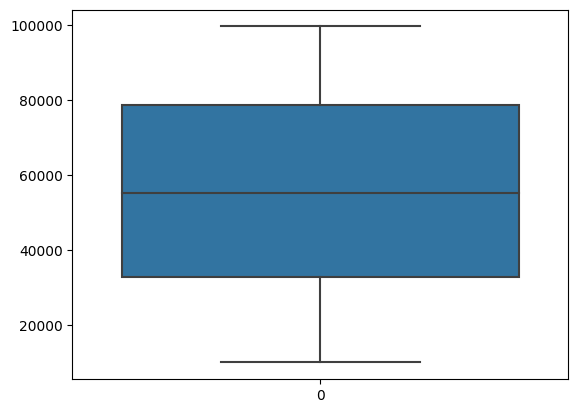

In [ ]:
sns.boxplot(df['Taxable.Income'])

In [ ]:
# corelation
df.corr()

<ipython-input-38-8c2af235ac03>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<Axes: xlabel='fraud_status', ylabel='count'>

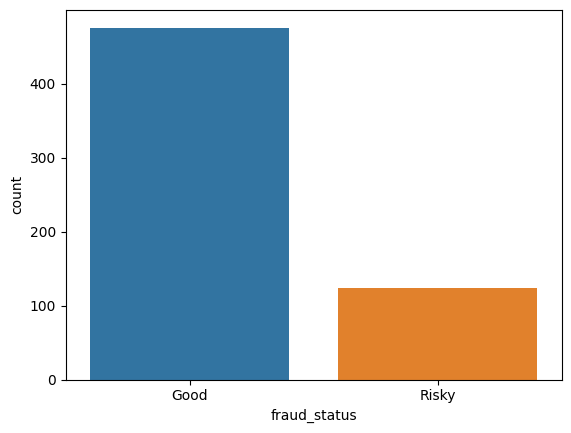

In [ ]:
df['fraud_status'] = ['Risky' if item <=30000 else 'Good' for item in df['Taxable.Income']]
# df['fraud_status'].value_counts()
sns.countplot(x=df['fraud_status'])

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
lb = LabelEncoder()

col = ['Marital.Status','Undergrad','Urban','fraud_status',]
df[col] = df[col].apply(lb.fit_transform)
df


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud_status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [ ]:
df.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud_status
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267,0.012523
Marital.Status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562,0.006081
Taxable.Income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628,-0.688725
City.Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098,0.012225
Work.Experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000,0.004830
fraud_status,0.012523,0.006081,-0.688725,0.012225,-0.001972,0.004830,1.000000


In [ ]:
df.head(5)
df['fraud_status'].value_counts()


0    476
1    124
Name: fraud_status, dtype: int64

In [ ]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud_status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [ ]:
X = df.iloc[:,[1,0,3,4,5]].values
y = df.iloc[:,-1].values

X.shape,y.shape


((600, 5), (600,))

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 476, 1: 124})
Resample dataset shape Counter({0: 476, 1: 476})


<Axes: ylabel='count'>

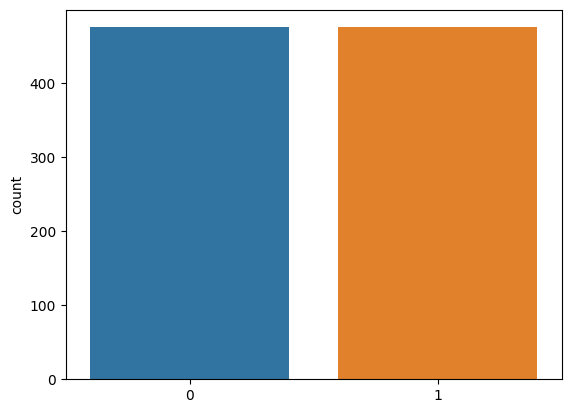

In [ ]:
sns.countplot(x=y_smote)

In [ ]:

ct = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x_smote = np.array(ct.fit_transform(x_smote))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(x_smote)
# X = X[:,1:]
X

array([[-0.7182782 , -0.78679579,  1.61432977, ..., -1.21345481,
        -0.67469608,  1.17981346],
       [ 1.39221823, -0.78679579, -0.61945212, ...,  0.4966852 ,
         0.30238803,  1.17981346],
       [-0.7182782 ,  1.27097782, -0.61945212, ...,  1.02848363,
         1.7680142 ,  1.17981346],
       ...,
       [-0.7182782 ,  1.27097782, -0.61945212, ..., -0.13154113,
         1.52374317, -0.84759162],
       [ 1.39221823, -0.78679579, -0.61945212, ...,  0.60866205,
        -1.28537365,  1.17981346],
       [ 1.39221823, -0.78679579, -0.61945212, ...,  0.76295075,
        -0.43042505,  1.17981346]])

In [ ]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
X_train,X_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.2,random_state=123)
kfold = KFold(n_splits=20,shuffle=True,random_state=123)




In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=15,criterion='entropy',max_depth=20,min_samples_split=2,random_state=123)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=15,
                       random_state=123)

In [ ]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(classifier,x_smote,y_smote,cv=kfold)
print(np.mean(acc))

0.7122562056737587


In [ ]:
classifier.score(X_train,y_train)

0.9894875164257556

In [ ]:
classifier.score(X_test,y_test)


0.6910994764397905

In [ ]:
y_pred = classifier.predict(X_test)
y_pred


array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1])

In [ ]:
y_pred_train  = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [ ]:
# result = ['True' if y_test.values == y_pred,values 'False']

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.612565445026178

In [ ]:
confusion_matrix(y_test,y_pred)

array([[60, 47],
       [27, 57]])

<Axes: >

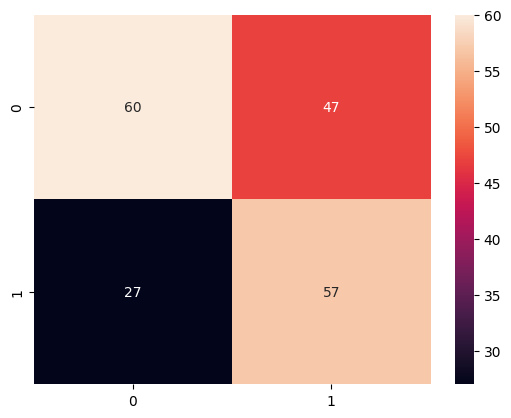

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.56      0.62       107
           1       0.55      0.68      0.61        84

    accuracy                           0.61       191
   macro avg       0.62      0.62      0.61       191
weighted avg       0.63      0.61      0.61       191



0.21260504201680672
0.8006302521008404


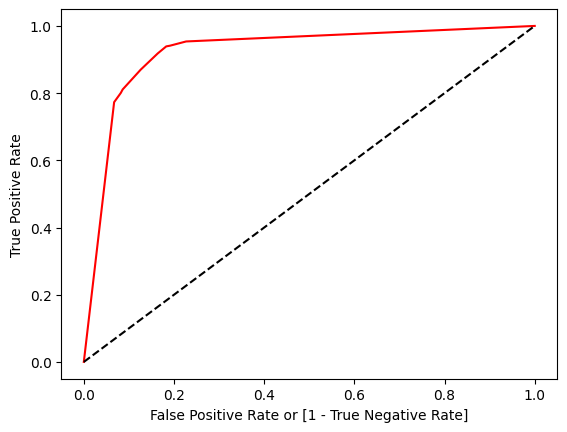

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_smote, classifier.predict_proba(x_smote)[:,1])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
print(fpr.mean())
print(tpr.mean())